Muhammad Aizar Yazid / 1103223097

In [49]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense, Dropout, Embedding, Bidirectional
from tensorflow.keras.metrics import AUC
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras import regularizers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report, auc, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

In [45]:
# Load and preprocess the data
data = pd.read_csv('ReviewTokoBaju.csv')
data_cleaned = data.drop(columns=['Unnamed: 0', 'Clothing ID', 'Title', 'Positive Feedback Count', 'Division Name', 'Department Name', 'Class Name'])
data_cleaned = data_cleaned.dropna(subset=['Review Text', 'Rating'])
data_cleaned['Rating'] = data_cleaned['Rating'].apply(lambda x: 1 if x >= 4 else 0)

In [46]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data_cleaned['Review Text'], data_cleaned['Rating'], test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform input size
max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

RNN Model

In [50]:
# Build the RNN model (LSTM)
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_len))
model.add(Bidirectional(LSTM(units=128, dropout=0.3, recurrent_dropout=0.3)))
model.add(Dropout(0.5))  # Adding Dropout for regularization
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))  # Dense layer with L2 regularization
model.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.0005)  # Lower learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', 'AUC'])


In [52]:
# Train the model again with more epochs
history = model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test))

Epoch 1/5
283/283 [==============================] - 110s 389ms/step - loss: 0.2282 - accuracy: 0.9147 - auc: 0.9547 - val_loss: 0.2961 - val_accuracy: 0.8870 - val_auc: 0.9279
Epoch 2/5
283/283 [==============================] - 99s 350ms/step - loss: 0.2156 - accuracy: 0.9223 - auc: 0.9593 - val_loss: 0.3370 - val_accuracy: 0.8825 - val_auc: 0.9206
Epoch 3/5
283/283 [==============================] - 101s 357ms/step - loss: 0.1933 - accuracy: 0.9302 - auc: 0.9674 - val_loss: 0.3554 - val_accuracy: 0.8737 - val_auc: 0.9131
Epoch 4/5
283/283 [==============================] - 100s 354ms/step - loss: 0.1836 - accuracy: 0.9341 - auc: 0.9704 - val_loss: 0.3122 - val_accuracy: 0.8737 - val_auc: 0.9210
Epoch 5/5
283/283 [==============================] - 115s 406ms/step - loss: 0.1717 - accuracy: 0.9409 - auc: 0.9736 - val_loss: 0.3400 - val_accuracy: 0.8730 - val_auc: 0.9145


142/142 [==============================] - 3s 19ms/step - loss: 0.3400 - accuracy: 0.8730 - auc: 0.9145
Test Accuracy: 87.30%
Test AUC: 0.91


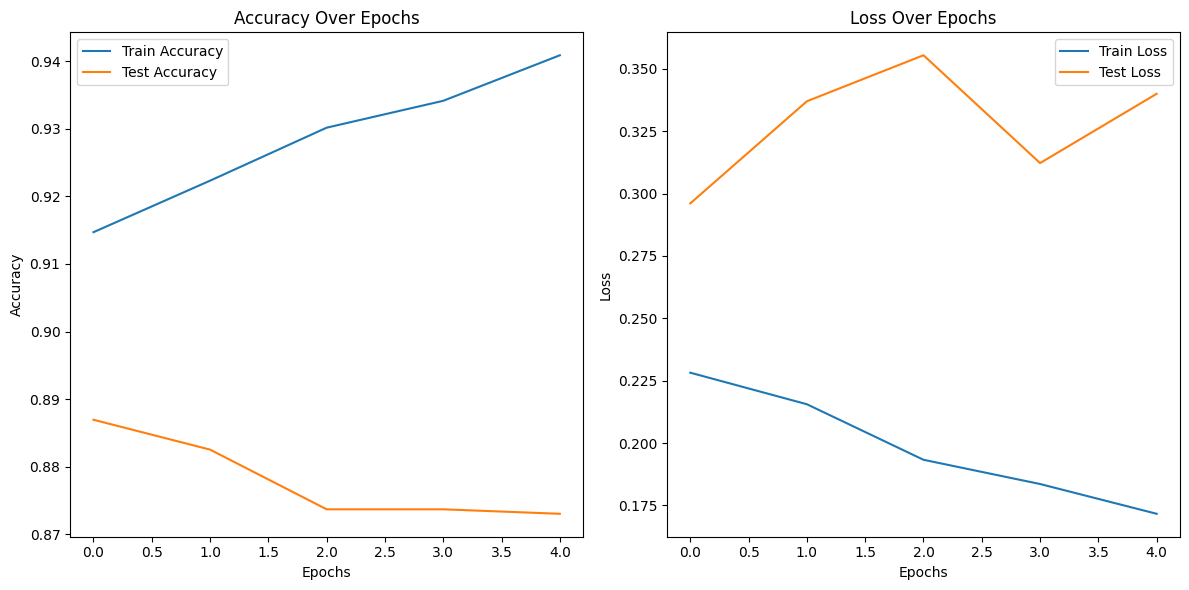

In [53]:
# Evaluate the model
loss, accuracy, auc = model.evaluate(X_test_pad, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")
print(f"Test AUC: {auc:.2f}")

# Visualize the training process (accuracy and loss)
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

LSTM Model

In [54]:
# Improved LSTM Model Architecture
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_len))  # Embedding layer
model.add(Bidirectional(LSTM(units=128, dropout=0.3, recurrent_dropout=0.3)))  # Bidirectional LSTM
model.add(Dropout(0.5))  # Dropout layer to prevent overfitting
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))  # Dense layer with L2 regularization
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

# Compile the model with a lower learning rate for better convergence
optimizer = Adam(learning_rate=0.0005)  # Lower learning rate for smoother convergence
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', 'AUC'])

In [56]:
# Train the model again with more epochs
history = model.fit(X_train_pad, y_train, epochs=4, batch_size=64, validation_data=(X_test_pad, y_test))

Epoch 1/4
283/283 [==============================] - 127s 448ms/step - loss: 0.7212 - accuracy: 0.8207 - auc: 0.8200 - val_loss: 0.3334 - val_accuracy: 0.8794 - val_auc: 0.9301
Epoch 2/4
283/283 [==============================] - 105s 372ms/step - loss: 0.2984 - accuracy: 0.8896 - auc: 0.9298 - val_loss: 0.2906 - val_accuracy: 0.8814 - val_auc: 0.9315
Epoch 3/4
283/283 [==============================] - 105s 370ms/step - loss: 0.2458 - accuracy: 0.9060 - auc: 0.9487 - val_loss: 0.2819 - val_accuracy: 0.8861 - val_auc: 0.9330
Epoch 4/4
283/283 [==============================] - 131s 464ms/step - loss: 0.2304 - accuracy: 0.9150 - auc: 0.9541 - val_loss: 0.3036 - val_accuracy: 0.8799 - val_auc: 0.9268


In [57]:
# Evaluate the model
loss, accuracy, auc = model.evaluate(X_test_pad, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")
print(f"Test AUC: {auc:.2f}")

# Visualize the training process (accuracy and loss)
plt.figure(figsize=(12, 6))

142/142 [==============================] - 4s 30ms/step - loss: 0.3036 - accuracy: 0.8799 - auc: 0.9268
Test Accuracy: 87.99%
Test AUC: 0.93


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

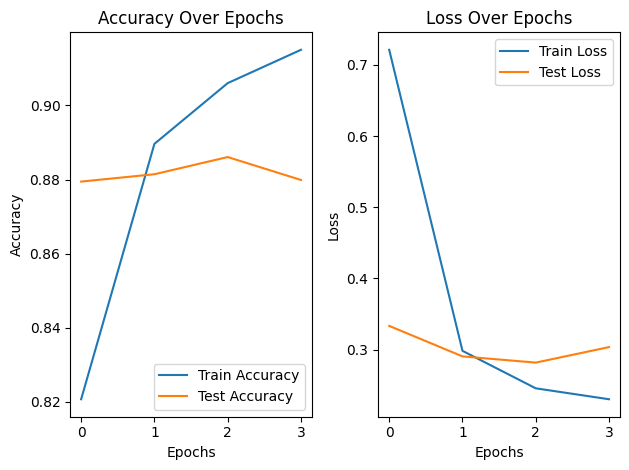

In [58]:
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

GRU Model

In [63]:
# Improved GRU Model Architecture
model_gru = Sequential()
model_gru.add(Embedding(input_dim=5000, output_dim=128, input_length=max_len))  # Embedding layer
model_gru.add(GRU(units=128, dropout=0.3, recurrent_dropout=0.3))  # GRU layer (instead of LSTM)
model_gru.add(Dropout(0.5))  # Dropout layer to prevent overfitting
model_gru.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))  # Dense layer with L2 regularization
model_gru.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

# Compile the model with a lower learning rate for better convergence
optimizer = Adam(learning_rate=0.0005)  # Lower learning rate for smoother convergence
model_gru.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', 'AUC'])


In [66]:
# Train the model again with more epochs
history_gru = model_gru.fit(X_train_pad, y_train, epochs=10, batch_size=64, validation_data=(X_test_pad, y_test))

Epoch 1/10
283/283 [==============================] - 18s 63ms/step - loss: 0.5085 - accuracy: 0.7710 - auc: 0.6489 - val_loss: 0.5390 - val_accuracy: 0.7693 - val_auc: 0.6798
Epoch 2/10
283/283 [==============================] - 17s 61ms/step - loss: 0.5343 - accuracy: 0.7710 - auc: 0.5562 - val_loss: 0.5323 - val_accuracy: 0.7693 - val_auc: 0.7323
Epoch 3/10
283/283 [==============================] - 18s 64ms/step - loss: 0.5252 - accuracy: 0.7710 - auc: 0.6204 - val_loss: 0.5169 - val_accuracy: 0.7693 - val_auc: 0.7644
Epoch 4/10
283/283 [==============================] - 18s 63ms/step - loss: 0.4785 - accuracy: 0.7710 - auc: 0.7617 - val_loss: 0.3904 - val_accuracy: 0.7693 - val_auc: 0.8799
Epoch 5/10
283/283 [==============================] - 18s 63ms/step - loss: 0.3659 - accuracy: 0.7802 - auc: 0.8880 - val_loss: 0.3561 - val_accuracy: 0.8722 - val_auc: 0.9118
Epoch 6/10
283/283 [==============================] - 18s 63ms/step - loss: 0.3168 - accuracy: 0.8788 - auc: 0.9186 - va

In [67]:
# Evaluate the model
loss, accuracy, auc = model_gru.evaluate(X_test_pad, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")
print(f"Test AUC: {auc:.2f}")

142/142 [==============================] - 2s 11ms/step - loss: 0.3158 - accuracy: 0.8750 - auc: 0.9195
Test Accuracy: 87.50%
Test AUC: 0.92


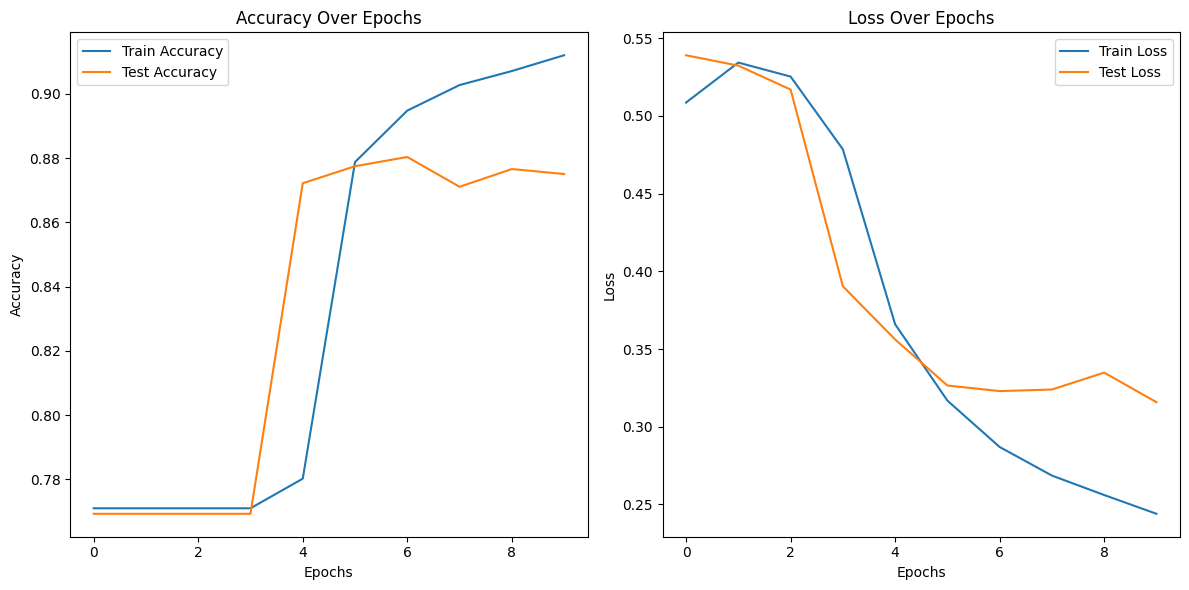

In [68]:
# Visualize the training process (accuracy and loss)
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_gru.history['accuracy'], label='Train Accuracy')
plt.plot(history_gru.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_gru.history['loss'], label='Train Loss')
plt.plot(history_gru.history['val_loss'], label='Test Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Recurrent Neural Networks (RNN), LSTM, and GRU: A Comparison

Recurrent Neural Networks (RNN), Long Short-Term Memory (LSTM), and Gated Recurrent Units (GRU) are popular models used for sequence data, such as text, speech, and time-series data. These models are designed to handle data where the order of information matters.

## 1. Recurrent Neural Networks (RNN)

### Overview:
Recurrent Neural Networks (RNNs) are a type of neural network designed for sequential data. Unlike traditional feedforward networks, RNNs have loops that allow information to be passed from one step to the next. This makes them ideal for time-series or text data, where each input depends on previous inputs.

### Architecture:
- RNNs have a simple architecture with a single hidden layer that processes input data sequentially.
- Each neuron in the network receives input from both the current time step and the previous hidden state, allowing the network to capture temporal dependencies.

### Advantages:
- Capable of modeling sequential data and capturing patterns over time.
- Relatively simple and computationally efficient.

### Disadvantages:
- **Vanishing Gradient Problem**: During training, RNNs can struggle with long sequences because gradients tend to vanish, making it difficult for the network to learn long-range dependencies.
- **Difficulty with Long Sequences**: RNNs are not great at capturing long-term dependencies in the data.

## 2. Long Short-Term Memory (LSTM)

### Overview:
Long Short-Term Memory (LSTM) networks are a type of RNN designed to overcome the limitations of basic RNNs, particularly the vanishing gradient problem. LSTMs use a more complex architecture, introducing "gates" to control the flow of information, which allows them to remember information over longer periods.

### Architecture:
- LSTM cells contain three main gates: the **input gate**, the **forget gate**, and the **output gate**.
  - **Input Gate**: Controls the information that flows into the memory cell.
  - **Forget Gate**: Decides what information should be discarded from the memory cell.
  - **Output Gate**: Determines what the next hidden state should be.

### Advantages:
- **Long-Term Dependencies**: LSTMs are particularly good at remembering information over long sequences, making them ideal for tasks where long-range dependencies are important (e.g., language modeling, machine translation).
- **Prevents Vanishing Gradient**: LSTMs mitigate the vanishing gradient problem by using their gating mechanisms to retain important information.

### Disadvantages:
- **Complexity**: LSTMs are computationally more expensive due to the extra gates.
- **Slower to Train**: Because of their complexity, LSTMs take longer to train compared to simpler RNNs.

## 3. Gated Recurrent Units (GRU)

### Overview:
Gated Recurrent Units (GRU) are a simplified version of LSTMs. They also address the vanishing gradient problem and are designed to capture long-range dependencies in sequential data, but with a more straightforward architecture than LSTMs.

### Architecture:
- GRUs have two main gates: the **update gate** and the **reset gate**.
  - **Update Gate**: Controls how much of the previous memory should be retained.
  - **Reset Gate**: Determines how much of the previous memory should be forgotten.
  
### Advantages:
- **Simplicity**: GRUs have fewer gates and parameters compared to LSTMs, making them simpler and faster to train.
- **Good Performance**: In many cases, GRUs perform similarly to LSTMs on tasks involving sequential data, and they often require less computation.

### Disadvantages:
- **Less Flexibility**: While GRUs are simpler, they might not capture as complex relationships in some types of sequential data compared to LSTMs.
- **Still susceptible to vanishing gradients**: Although GRUs are better at retaining long-term dependencies than standard RNNs, they can still face challenges with extremely long sequences.

## Comparison of RNN, LSTM, and GRU

| Feature                     | RNN                            | LSTM                            | GRU                            |
|-----------------------------|--------------------------------|---------------------------------|--------------------------------|
| **Gates**                   | None                           | 3 (Input, Forget, Output)       | 2 (Update, Reset)              |
| **Memory**                   | Short-term memory              | Long-term memory                | Long-term memory                |
| **Training Speed**           | Fast                           | Slow (due to complexity)        | Faster than LSTM               |
| **Handling Long-Term Dependencies** | Struggles with long sequences | Excellent                       | Good                           |
| **Computational Complexity** | Low                            | High                            | Moderate                       |
| **Use Case**                 | Simple sequences               | Complex sequences with long dependencies | Good balance of performance and speed |

## Conclusion:
- **RNN**: Best for simple sequential tasks but struggles with long-term dependencies.
- **LSTM**: Ideal for tasks requiring the model to remember long sequences and capture long-term dependencies, at the cost of higher complexity and slower training.
- **GRU**: A good alternative to LSTM with fewer parameters and faster training, providing a balance between performance and computational efficiency.

When choosing between these models, it's important to consider the nature of your data and the complexity of the task. For simple tasks, an RNN may suffice, but for tasks with long-range dependencies, LSTMs or GRUs would be better choices.
